ARTI406 - Machine Learning

# Assignment 1: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

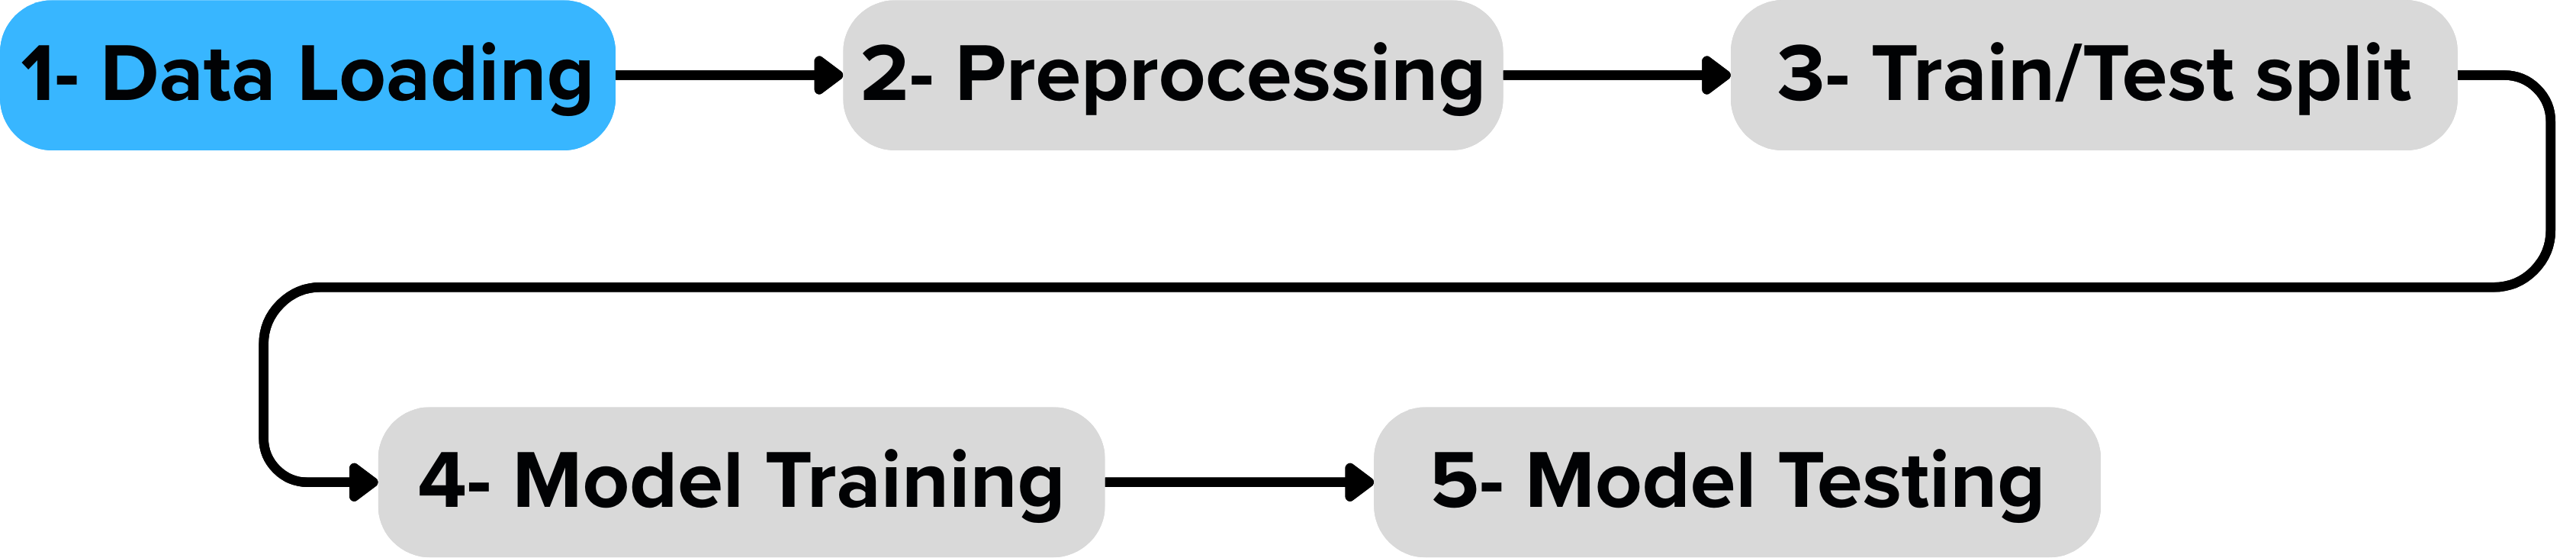

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [3]:
# Load Dataset
df = pd.read_csv("retail_sales_dataset.csv")
# Display first 5 rows. If you want to display all rows, use df.head(-1)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Check Missing Values

In [4]:
# Check all values
print(df.isna())

     Transaction ID   Date  Customer ID  Gender    Age  Product Category  \
0             False  False        False   False  False             False   
1             False  False        False   False  False             False   
2             False  False        False   False  False             False   
3             False  False        False   False  False             False   
4             False  False        False   False  False             False   
..              ...    ...          ...     ...    ...               ...   
995           False  False        False   False  False             False   
996           False  False        False   False  False             False   
997           False  False        False   False  False             False   
998           False  False        False   False  False             False   
999           False  False        False   False  False             False   

     Quantity  Price per Unit  Total Amount  
0       False           False         Fal

In [ ]:
print(df.isna().sum()) #sums the Nan values of each column

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


### Check duplicate rows

In [6]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [7]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1000, 9) 

number of rows:  1000
number of columns:  9


### Data type of columns

In [8]:
# viewing the data types of columns
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # translates the Date column datatype into datetime datatype
df['Total Amount'] = df['Total Amount'].replace(r'[\$,]', '', regex=True) # cleans the total amount column values from any non numeric value
df['Total Amount'] = pd.to_numeric(df['Total Amount']) # translates strings or objects to a numeric value

df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [17]:
# Statistical summary
df.describe(include='all')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


### Descriptive summary Statistics

### Univariate Analysis

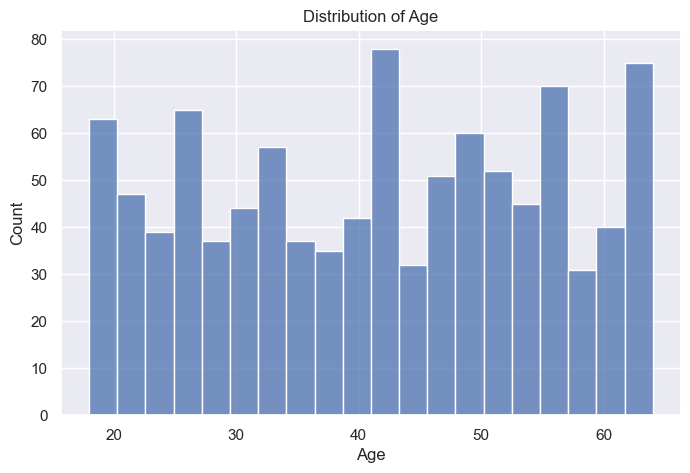

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20) 
plt.title("Distribution of Age")
plt.show()

### Distribution of Revenue

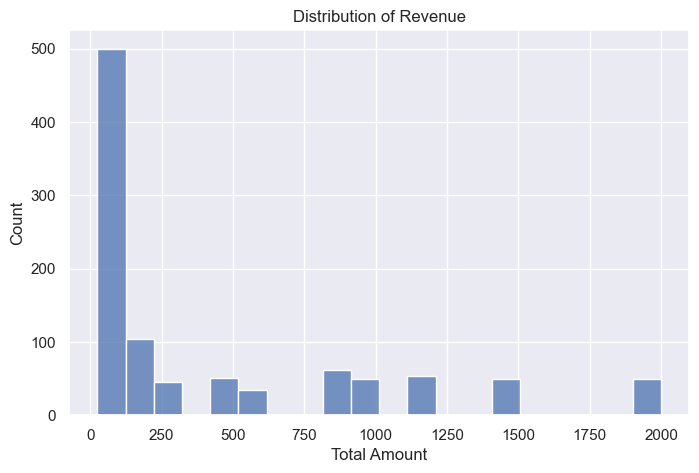

In [ ]:
# plots the total amount for revenue
plt.figure(figsize=(8,5))
sns.histplot(df['Total Amount'], bins=20) 
plt.title("Distribution of Revenue")
plt.show()

## Bivariate Analysis

### Revenue by Product

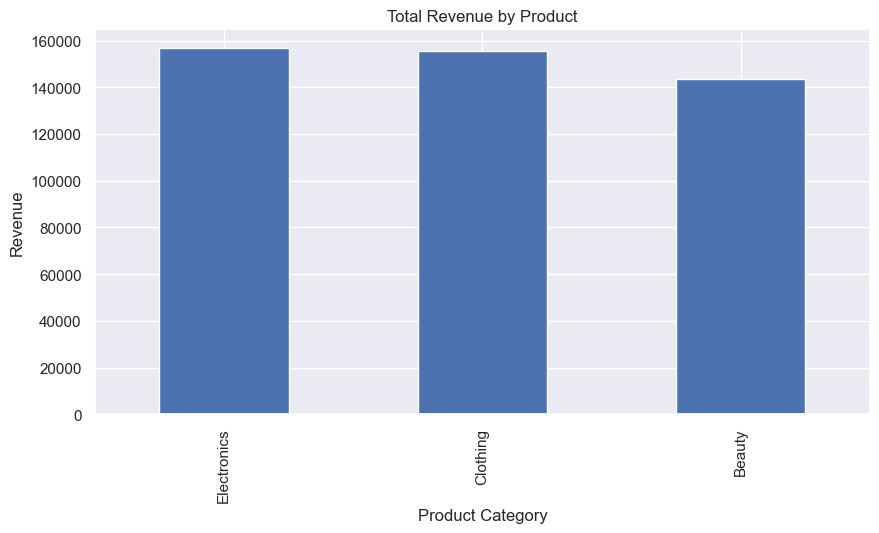

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

In [23]:
# makes a dataframe from products and the prices
product_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Total Revenue by Product")
plt.ylabel("Revenue")
plt.show()

product_revenue

### Ages vs Revenue Relationship

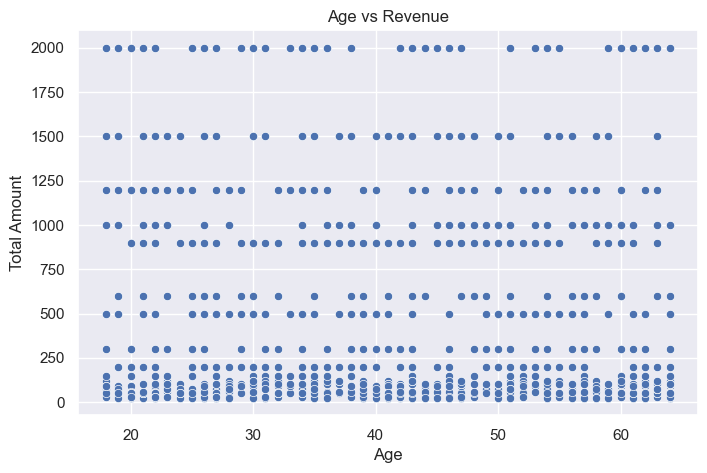

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title("Age vs Revenue")
plt.show()

### Correlation Matrix

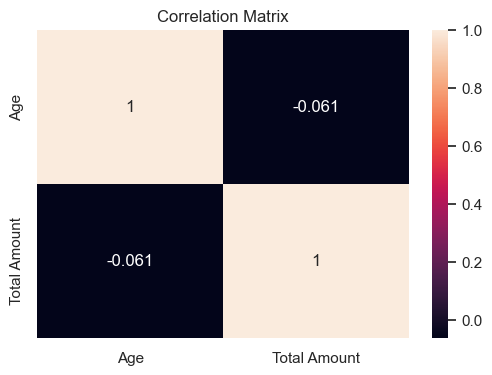

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Total Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Revenue Trend

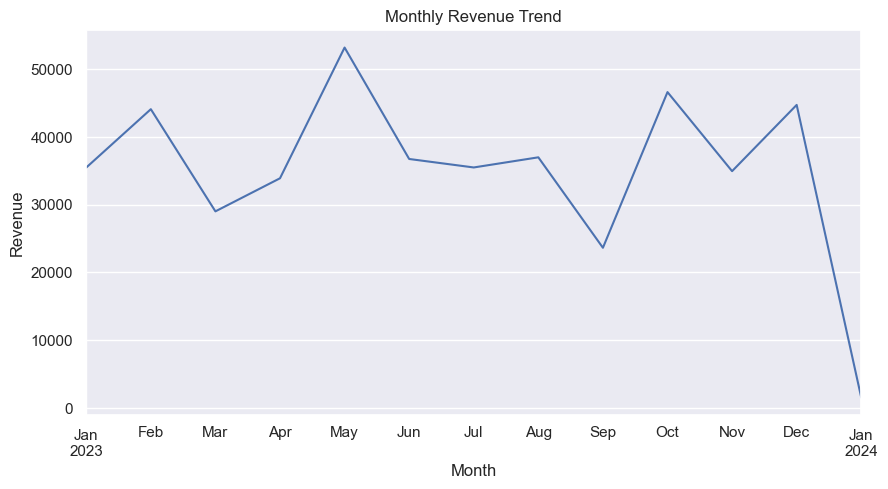

In [27]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the following to the assignment 1 folder.
1. Dataset file 
2. Dataset Description readme file
2. Jupyter Notebook
